SVM vs Random Forest

🔹 First 10 rows of the Breast Cancer dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010       

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18516\682460387.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="coolwarm")


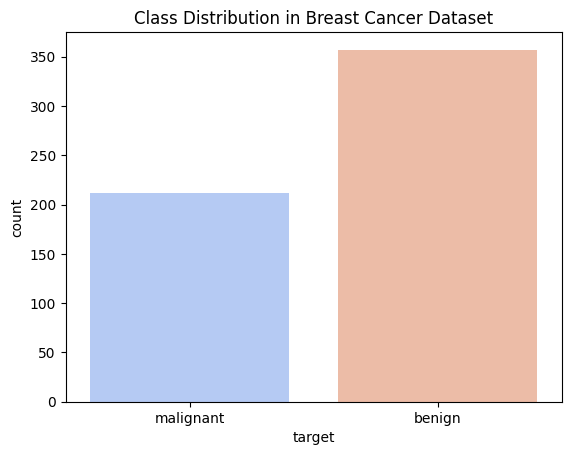


SVM Accuracy: 0.9649122807017544
Random Forest Accuracy: 0.9707602339181286

SVM Report:
               precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Random Forest Report:
               precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Confusion Matrix - SVM:
 [[ 59   4]
 [  2 106]]

Confusion Matrix - Random Forest:
 [[ 59   4]
 [  1 107]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Breast Cancer dataset
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target
target_names = cancer.target_names  # ['malignant', 'benign']

# Convert to DataFrame for better printing
df = pd.DataFrame(X, columns=cancer.feature_names)
df['target'] = [target_names[i] for i in y]

print("🔹 First 10 rows of the Breast Cancer dataset:")
print(df.head(10))

# 2. Show class distribution
sns.countplot(x="target", data=df, palette="coolwarm")
plt.title("Class Distribution in Breast Cancer Dataset")
plt.show()

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 5. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 6. Evaluation
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nSVM Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))

print("\nConfusion Matrix - SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("\nConfusion Matrix - Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


Another way to load data

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target




import pandas as pd

df = pd.read_csv("breast_cancer.csv")   # path to local file
X = df.drop("target", axis=1)
y = df["target"]



import numpy as np

X = np.load("X.npy")
y = np.load("y.npy")


🔹 First 10 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840   

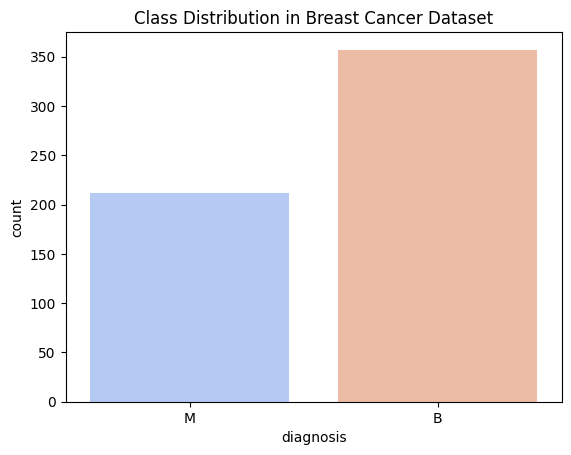


SVM Accuracy: 0.9649122807017544
Random Forest Accuracy: 0.9707602339181286

SVM Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Random Forest Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Confusion Matrix - SVM:
 [[106   2]
 [  4  59]]

Confusion Matrix - Random Forest:
 [[107   1]
 [  4  59]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Load dataset from CSV
df = pd.read_csv("B_data.csv")

print("🔹 First 10 rows of the dataset:")
print(df.head(10))

# 2️⃣ Handle missing values (replace NaN with column mean)
df = df.fillna(df.mean(numeric_only=True))

# 3️⃣ Encode target variable (diagnosis)
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['diagnosis'])
target_names = list(label_encoder.classes_)  # ['B', 'M']

# 4️⃣ Drop non-numeric or ID columns if present
X = df.drop(columns=['diagnosis', 'target', 'id'], errors='ignore')
y = df['target']

# 5️⃣ Show class distribution
sns.countplot(x="diagnosis", hue="diagnosis", data=df, palette="coolwarm", legend=False)
plt.title("Class Distribution in Breast Cancer Dataset")
plt.show()

# 6️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 7️⃣ Train SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 8️⃣ Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 9️⃣ Evaluation
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nSVM Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))

print("\nConfusion Matrix - SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("\nConfusion Matrix - Random Forest:\n", confusion_matrix(y_test, y_pred_rf))


🔹 First 10 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840   

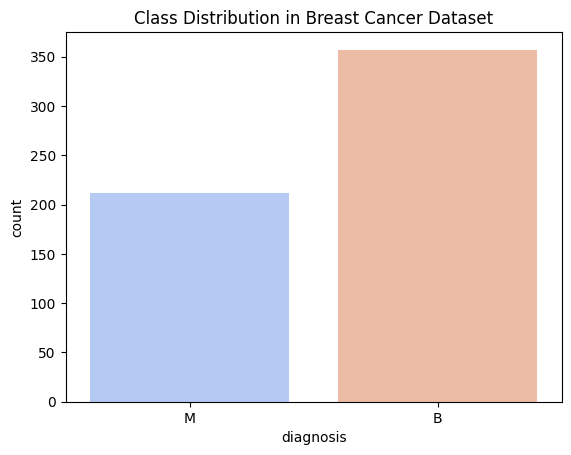


SVM Accuracy: 0.9649122807017544
Random Forest Accuracy: 0.9707602339181286

SVM Report:
               precision    recall  f1-score   support

           B       0.96      0.98      0.97       108
           M       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171


Random Forest Report:
               precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Confusion Matrix - SVM:
 [[106   2]
 [  4  59]]

Confusion Matrix - Random Forest:
 [[107   1]
 [  4  59]]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8812\3111661774.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances[rf_sorted_idx], y=feature_names[rf_sorted_idx], palette="viridis")


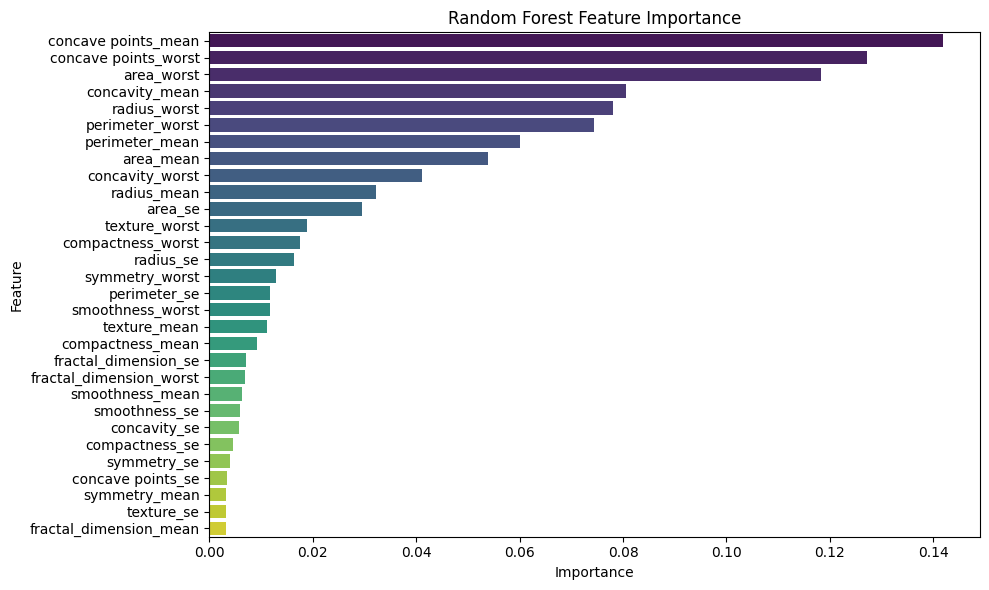

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8812\3111661774.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=svm_importances[svm_sorted_idx], y=feature_names[svm_sorted_idx], palette="magma")


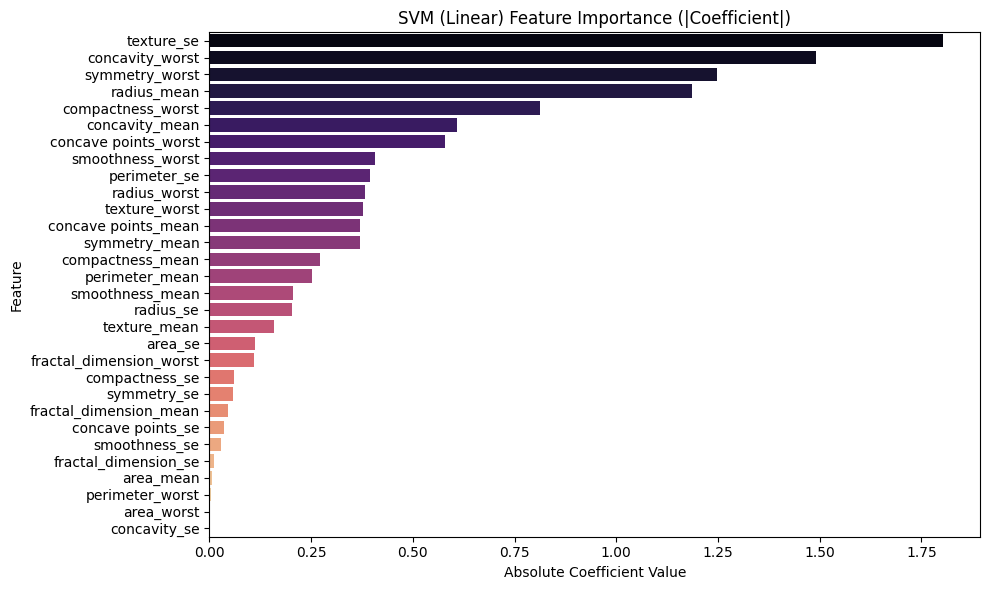

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

#  Load dataset from CSV
df = pd.read_csv("B_data.csv")

print("🔹 First 10 rows of the dataset:")
print(df.head(10))

#  Handle missing values (replace NaN with column mean)
df = df.fillna(df.mean(numeric_only=True))

#  Encode target variable (diagnosis)
label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['diagnosis'])
target_names = list(label_encoder.classes_)  # ['B', 'M']

#  Drop non-numeric or ID columns if present
X = df.drop(columns=['diagnosis', 'target', 'id'], errors='ignore')
y = df['target']
feature_names = X.columns

#  Show class distribution
sns.countplot(x="diagnosis", hue="diagnosis", data=df, palette="coolwarm", legend=False)
plt.title("Class Distribution in Breast Cancer Dataset")
plt.show()

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Train SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

#  Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

#  Evaluation
print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nSVM Report:\n", classification_report(y_test, y_pred_svm, target_names=target_names))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf, target_names=target_names))

print("\nConfusion Matrix - SVM:\n", confusion_matrix(y_test, y_pred_svm))
print("\nConfusion Matrix - Random Forest:\n", confusion_matrix(y_test, y_pred_rf))

#  Feature Importance Comparison

# --- Random Forest Feature Importances ---
rf_importances = rf_model.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importances[rf_sorted_idx], y=feature_names[rf_sorted_idx], palette="viridis")
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# --- SVM Feature Coefficients (absolute values) ---
svm_importances = np.abs(svm_model.coef_[0])
svm_sorted_idx = np.argsort(svm_importances)[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=svm_importances[svm_sorted_idx], y=feature_names[svm_sorted_idx], palette="magma")
plt.title("SVM (Linear) Feature Importance (|Coefficient|)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
